In [2]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

In [3]:
# データの取得
nile = sm.datasets.get_rdataset("Nile")
a = nile.data.rename(columns={'time': 'year'})
a['year'] = pd.to_datetime(a['year'],  format='%Y')

data = a.set_index('year')

data.head()

,value
year,
1871-01-01,1120
1872-01-01,1160
1873-01-01,963
1874-01-01,1210
1875-01-01,1160


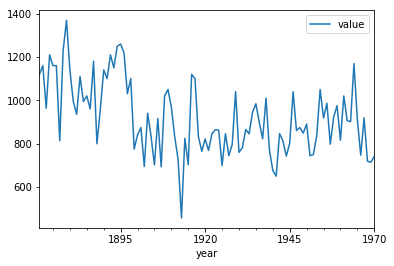

In [4]:
# データの確認
data.plot()

In [5]:
#五数要約
data.describe()

,value
count,100.000000
mean,919.350000
std,169.227501
min,456.000000
25%,798.500000
50%,893.500000
75%,1032.500000
max,1370.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1bcc7409e8>]],
      dtype=object)

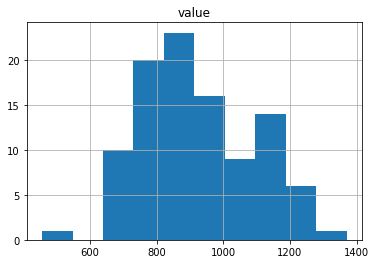

In [6]:
# histgramの確認
data.hist()

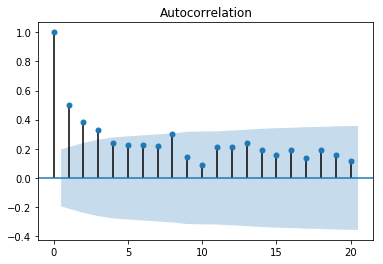

In [12]:
# 自己相関係数
# グラフに表示されている薄い青の帯: Bartlett’s formulaの95%信頼区間
from statsmodels.graphics.tsaplots import plot_acf

s = data['value']
plot_acf(s);

In [11]:
s.values

array([1120, 1160,  963, 1210, 1160, 1160,  813, 1230, 1370, 1140,  995,
        935, 1110,  994, 1020,  960, 1180,  799,  958, 1140, 1100, 1210,
       1150, 1250, 1260, 1220, 1030, 1100,  774,  840,  874,  694,  940,
        833,  701,  916,  692, 1020, 1050,  969,  831,  726,  456,  824,
        702, 1120, 1100,  832,  764,  821,  768,  845,  864,  862,  698,
        845,  744,  796, 1040,  759,  781,  865,  845,  944,  984,  897,
        822, 1010,  771,  676,  649,  846,  812,  742,  801, 1040,  860,
        874,  848,  890,  744,  749,  838, 1050,  918,  986,  797,  923,
        975,  815, 1020,  906,  901, 1170,  912,  746,  919,  718,  714,
        740])

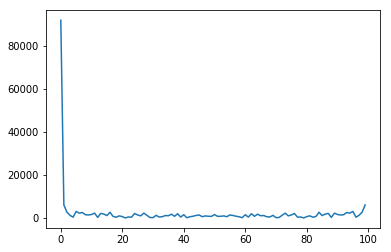

In [10]:
# 振幅スペクトルを計算
# 特に周波数成分は確認できない
from numpy.fft import fft, fftn, ifftn, fftfreq
import numpy as np
a_s = s.values
F = fft(a_s)

F_abs = np.abs(F)
plt.plot(F_abs)

/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


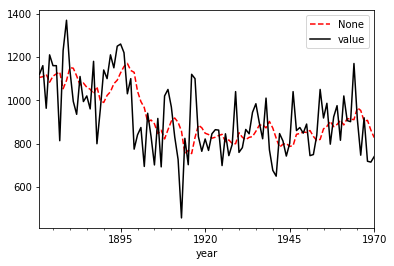

In [8]:
# holt winters法
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fit1 = ExponentialSmoothing(s, seasonal_periods=4, trend='add').fit(use_boxcox=True)
fit1.fittedvalues.plot(style='--', color='red',legend=True)
s.plot(color='black', legend=True)
#fit1.forecast(12).plot(style='--', marker='o', color='red', )

plt.show()